# General setting

In [ ]:
!apt install swig
!pip install stable-baselines3[extra]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,533 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 155673 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpa

In [ ]:
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
import gym
drive.mount('/content/drive/',force_remount=True)
#helper directory
sys.path.insert(0,'/content/drive/MyDrive/BackUp_RL_CodeBase/helpers')
#file directory
os.chdir('/content/drive/MyDrive/BackUp_RL_CodeBase/')
#saving directory
path = os.getcwd()
save_dir = path + '/log_RL/'
model_dir = path+ '/trained_models/'
print(f'save_dir: {save_dir}')
print(f'model_dir: {model_dir}')

Mounted at /content/drive/
save_dir: /content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/
model_dir: /content/drive/MyDrive/BackUp_RL_CodeBase/trained_models/


In [ ]:
#small helpers
import config
from helperFunction import data_split,splitByRatio  
from helperFunction import get_attributes,get_method

#standard lib
from gym.utils import seeding
from gym import spaces

from stable_baselines3.common.vec_env import DummyVecEnv,VecNormalize
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import A2C, DDPG, PPO
from stable_baselines3.common.logger import configure
import torch as th

import matplotlib.pyplot as plt
%matplotlib inline


# User Inputs

In [ ]:
# # 5 days
# # specify model name and logfile name
# train_s = '2016-12-31' # input1
# train_e = '2017-01-10' # input2
# test_s = train_e
# test_e = '2017-01-18' # input3
# trainY = train_s[2:4]+train_e[2:4]
# nTimes = 200 # input 4
# note = '2Stocks_TA_5days' # input 5 
# agent = 'PPO' # input 6 
# fullSelection = False # input 7
# selected = ['OR.PA','BBVA.MC'] # fullSelection = False, selected will be used

# # log folder 
# log_folder = f'{agent}_{nTimes}_{trainY}_{note}/'
# print(f'logging to diretory: {save_dir}{log_folder}')
# # log model name
# model_name = f'{agent}_{nTimes}_{trainY}_{note}'
# print(f'model saving to: {model_dir} as {model_name}')

# # make log directory if not exist:
# if not os.path.exists(f'{save_dir}{log_folder}'):
#     os.makedirs(f'{save_dir}{log_folder}')

logging to diretory: /content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/PPO_200_1617_2Stocks_TA_5days/
model saving to: /content/drive/MyDrive/BackUp_RL_CodeBase/trained_models/ as PPO_200_1617_2Stocks_TA_5days


In [ ]:
# # 20 days
# # specify model name and logfile name
# train_s = '2016-12-31' # input1
# train_e = '2017-01-30' # input2
# test_s = train_e
# test_e = '2017-02-27' # input3
# trainY = train_s[2:4]+train_e[2:4]
# nTimes = 50 # input 4
# note = 'AllStocks_TA_20days' # input 5 
# agent = 'PPO' # input 6 
# fullSelection = True # input 7
# selected = ['OR.PA','BBVA.MC'] # fullSelection = False, selected will be used

# # log folder and model name
# log_folder = f'{agent}_{nTimes}_{trainY}_{note}/'
# print(f'logging to diretory: {save_dir}{log_folder}')

# model_name = f'{agent}_{nTimes}_{trainY}_{note}'
# print(f'model saving to: {model_dir} as {model_name}')

# # make log directory if not exist:
# if not os.path.exists(f'{save_dir}{log_folder}'):
#     os.makedirs(f'{save_dir}{log_folder}')

logging to diretory: /content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/PPO_50_1617_AllStocks_TA_20days/
model saving to: /content/drive/MyDrive/BackUp_RL_CodeBase/trained_models/ as PPO_50_1617_AllStocks_TA_20days


In [ ]:
# one year
# specify model name and logfile name
train_s = '2016-12-31' # input1
train_e = '2017-12-31' # input2
train_e = '2017-12-31' # input2
test_s = train_e
test_e = '2018-12-31' # input3
trainY = train_s[2:4]+train_e[2:4]
nTimes = 50 # input 4
note = 'AllStocks_TA' # input 5 
agent = 'PPO' # input 6 
fullSelection = True # input 7
selected = ['OR.PA','BBVA.MC'] # fullSelection = False, selected will be used


# log folder and model name
log_folder = f'{agent}_{nTimes}_{trainY}_{note}/'
print(f'logging to diretory: {save_dir}{log_folder}')

model_name = f'{agent}_{nTimes}_{trainY}_{note}'
print(f'model saving to: {model_dir} as {model_name}')

# make log directory if not exist:
if not os.path.exists(f'{save_dir}{log_folder}'):
    os.makedirs(f'{save_dir}{log_folder}')

logging to diretory: /content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/PPO_50_1617_AllStocks_TA/
model saving to: /content/drive/MyDrive/BackUp_RL_CodeBase/trained_models/ as PPO_50_1617_AllStocks_TA


# Data Prep

## Read input and split data

In [ ]:
# read data for environment
# D_cleanInput annulized return lookback=252
# E_cleanInput ranks of all stocks individual position relative to k days ago
# F_cleanInput individual position relative to k days ago

df=pd.read_pickle("Input/E_cleanInput.pkl")
df=df.sort_values(['tic','date'],ignore_index=True) 

In [ ]:
#split data
train = data_split(df, train_s,train_e) # index resetted
test = data_split(df, test_s,test_e) # index resetted
print( f'training: {len(train.date.unique())} days')
print( f'testing: {len(test.date.unique())} days')

training: 255 days
testing: 255 days


## Subset df, if selection

If there is a selection, then we will override train and test with the subset of the selection.

In [ ]:
def subsetDF(listSelection,df):
  ''' subsetselected stocks and store in df_new'''
  listSelection.sort(reverse=False) # A.B...Y.Z
  df_new = pd.DataFrame()
  for i in range(len(listSelection)):
    mask = df.tic == listSelection[i]
    df_selected = df[mask]
    df_new = df_new.append(df_selected)
  # sort the dataframe
  df_new= df_new.sort_values(['date','tic'],ignore_index=True)
  df_new.index = df_new.date.factorize()[0]
  return df_new

def subsetAr(listSelection,df):
  '''subset ar table'''
  listSelection.sort(reverse=False)
  for i in range(len(df)):
    df.ar.iloc[i] = df.ar.iloc[i][listSelection]
  return df

if fullSelection:
  # no alternation for fullSelection
  listSelection = df.tic.unique().tolist()
else: 
  listSelection = selected
  # subset train
  train_t1 = subsetDF(listSelection,train)
  train_t2 = subsetAr(listSelection,train_t1)
  # subset test
  test_t1 = subsetDF(listSelection,test)
  test_t2 = subsetAr(listSelection,test_t1)  
  # override the df
  train = train_t2
  test = test_t2

Prep adding progress indicator to the state space


In [ ]:
def dateProg(df):
  adding = df
  adding['day'] = df.index /df.index[-1] +0
  for q in range(df.shape[0]):
    adding.ar.iloc[q]['day'] = df.day.iloc[q]
  return adding
train = dateProg(train)
test = dateProg(test)

# Make Environment

In [ ]:
class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame, input data
        stock_dim : int, number of unique stocks
        initial_amount : int, start capital
        state_space: int, the dimension of input features
        action_space: int, equals stock dimension
        day: int, an increment number to control date
        tech_indicator_list: list, a list of technical indicator names in the dataframe
        transaction_cost_pct: float, transaction cost percentage per trade
        reward_scaling: float, scaling factor for reward, good for training

    Methods
    -------
    step()
        at each step the agent will return actions, then 
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step
        

    """
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                initial_amount,
                transaction_cost_pct,
                state_space,
                action_space,
                lookback=252,
                day = 0):
        super(gym.Env, self).__init__() 
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim  
        self.initial_amount = initial_amount
        self.state_space = state_space
        self.action_space = action_space
        self.terminal = False  
        
        # action space is the number of stock
        self.action_space = spaces.Box(low = 0, high = 20,shape = (self.action_space,)) 
        # observation space is the daily return matrix with one year lookback period
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space,self.stock_dim+1))

        # select remaining data for a given date, and select the return matrix for that day. that will be the state, if we don't add more
        self.data = self.df.loc[self.day,:]
        self.ret = self.data.iloc[0]['ar']
        self.state = self.ret
   
        # book keeper
        # date memory
        self.date_memory=[self.data.date.unique()[0]]
        self.portfolio_value = self.initial_amount
        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [1]
        # self.portfolio_return_memory = [0]
        # eq initialization, could be random if needed.
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]

        
    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe Ratio: ",sharpe)
            print("=================================")
            
            return self.state, self.reward, self.terminal,{}

        else:
            print("Model actions: ",actions)
            weights = self.softmax_normalization(actions) 
            print("Weights: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.ret = self.data.iloc[0]['ar']
            self.state = self.ret
            
            # debug print
            print(self.day)
            print(self.state)
            # print(f"last day memory: {last_day_memory}")
            # print(f"counter: {self.day}")
            # print(f"current day info: {self.data}")

            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            print(f'portfolio return:{portfolio_return}')
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            print(f'portfolio value:{self.portfolio_value}')
            self.portfolio_value = new_portfolio_value
            print(f"new portfolio value: {new_portfolio_value}")

            #debug print
            # print(f"close value t= {self.day} : {self.data.close.values}")
            # print(f"close value t= {self.day-1} : {last_day_memory.close.values}")
            # print(f" .......")
            # print(f"actions: {actions}")
            # print(f"weights: {weights}")
            # print(f" .......")
            # print(f"portfolio return Type: {type(portfolio_return)}")
            # print(f"portfolio return: {portfolio_return}")
            # print(f"new portfolio value Type: {type(new_portfolio_value)}")
            # print(f"new portfolio value: {new_portfolio_value}")

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value 
            self.reward = new_portfolio_value 
            #print("Step reward: ", self.reward)
            # we change the reward to log portfolio return, so the reward will be additive
            # self.reward = np.round(np.log(1+portfolio_return-0),4)

        return self.state, self.reward, self.terminal, {'weights':weights}

    def reset(self):
        # date and state
        self.terminal = False 
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.ret = self.data.iloc[0]['ar']
        self.state =self.ret
        print(f'Environment reset. Day: {self.day}, State: {self.state}')

        # bookkeeping
        self.date_memory=[self.data.date.unique()[0]] 
        self.portfolio_value = self.initial_amount
        # self.portfolio_return_memory = [0]
        self.portfolio_return_memory = [1] # using port return
        self.asset_memory = [self.initial_amount]

        #initialize action equally
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        # self.actions_memory=[[1/(self.stock_dim-1)]*(self.stock_dim-1)] # substract 1 as we have day progress bar along the way
        #random initialization at rest
        # ls= np.random.default_rng(seed=0).random((42))
        # self.actions_memory = [(ls/ls.sum()).tolist()]
        # Another test
        # self.actions_memory = initWeight
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=0):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs
    
    def close(self):
      pass

# create environment, # get_attributes(e_train_gym)
print(f'number of tickers : {len(train.tic.unique())}')
print(f'training period : {len(train.date.unique())}')
print(f'testing period: {len(test.date.unique())}')
print(f'training Ratio:  {np.round(train.shape[0]/(test.shape[0]+train.shape[0]),2)}')

# environment setting
stock_dimension = len(train.tic.unique())
state_space =1 # single input for state representation
env_kwargs = {
    "initial_amount": 1, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension,
    "action_space":stock_dimension,}
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

# define environment
e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)
print( f'action space: {e_train_gym.action_space}, observation_space: {e_train_gym.observation_space}')
# get_attributes(e_train_gym)

#normalize the environment
mon_env = Monitor(e_train_gym,filename = f'{save_dir}{log_folder}',allow_early_resets=False)
env = DummyVecEnv([lambda:mon_env])
e_train_gym = VecNormalize(env)


number of tickers : 42
training period : 255
testing period: 255
training Ratio:  0.5
Stock Dimension: 42, State Space: 1
action space: Box(0.0, 20.0, (42,), float32), observation_space: Box(-inf, inf, (1, 43), float32)


In [ ]:
# e_train_gym.reset()
# obs, reward, done ,info = e_train_gym.step(e_train_gym.action_space.sample())

## Monitor Random Agent

Streaming output truncated to the last 5000 lines.
portfolio return:0.0068281195553744406
portfolio value:1.071139554852285
new portfolio value: 1.0784534237933072
done:False
Model actions:  [3.6634073  6.829346   8.425761   5.8624086  2.5305562  1.4167353
 2.1623144  0.1988277  8.658136   0.98167086 4.3260345  4.269405
 0.64186144 0.15727168 5.3318877  8.731753   9.968179   0.90023744
 1.4840498  4.997897   9.205503   8.838778   4.7069983  5.58428
 5.6644883  2.7448182  4.1485205  8.583936   9.077718   5.761792
 1.8867996  3.6284914  3.8805394  1.7757978  6.0516386  2.3614385
 0.84257    8.460136   0.56083024 2.7847722  9.390273   2.482333  ]
Weights:  [4.3821646e-04 1.0390548e-02 5.1280554e-02 3.9509619e-03 1.4115547e-04
 4.6341647e-05 9.7672499e-05 1.3710109e-05 6.4695187e-02 2.9993374e-05
 8.5008825e-04 8.0328586e-04 2.1352465e-05 1.3152046e-05 2.3243446e-03
 6.9637544e-02 2.3978175e-01 2.7647717e-05 4.9568498e-05 1.6643715e-03
 1.1183829e-01 7.7503882e-02 1.2442698e-03 2.9916663e-

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


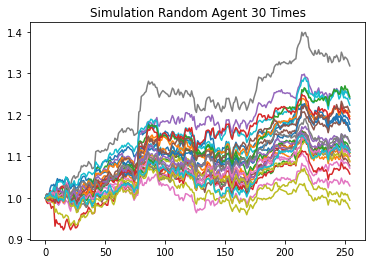

In [ ]:
nSim =30
# wrapper on the environment, monitor episodic reward while taking random actions
e_train_rnd = StockPortfolioEnv(df = train, **env_kwargs)
e_train_rnd = Monitor(e_train_rnd) # do not log
ls_eps_reward = []
ls_trajectory = {}
# test for 3 times
for i in range(nSim):
  #episodic length
  e_train_rnd.reset()
  done = e_train_rnd.terminal
  e_train_rnd.action_space.np_random.seed(i)
  while not done:
    # e_train_rnd.seed(321)
    r_act = e_train_rnd.action_space.sample()
    obs, reward, done ,info  = e_train_rnd.step(r_act)
    print(f'done:{done}')
  eps_reward = e_train_rnd.get_episode_rewards()
  ls_trajectory[i] = e_train_rnd.save_asset_memory()
ls_eps_reward.append(eps_reward)
print(f'episodic reward:{ls_eps_reward}')
# 2) df daily return simulation
mcSim = ls_trajectory[0] 
mcSim=mcSim.rename(columns = {'daily_return':'sim_0'})
mcSim['sim_'+str(0)].iloc[0] = 0
for m in range(1,nSim):
  mcSim['sim_'+str(m)] = ls_trajectory[m].daily_return
  mcSim['sim_'+str(m)].iloc[0] = 0
# compute index performance
rndAgent = pd.DataFrame()
rndAgent['date'] = mcSim['date']
for m in range(0,nSim):
  rndAgent['simRun_'+str(m)] = (mcSim['sim_'+str(m)]+1).cumprod()
#3) plot simulation, legend(bbox_to_anchor=(1.0, 1.0),ncol=3)
randMean = np.round(rndAgent.mean(axis=1).iloc[-1],4)
randStd = np.round(rndAgent.std(axis=1).iloc[-1],4)
print(f'mean: {randMean}, std: {randStd}')
rndAgent.plot(title=f'Simulation Random Agent {nSim} Times',legend=False)

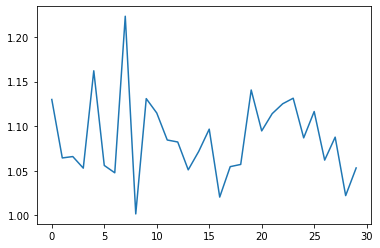

In [ ]:
(pd.DataFrame(e_train_rnd.episode_returns)/(len(train.date.unique()))).plot(legend=False)

# Define the agent


In [ ]:
# 36min,5000  # all stocks,20days 18min,2000 46min,5000
# batch_size = int(np.round(epsLen*0.5,0)) 

In [ ]:
# trainingsteps
epsLen = int(train.shape[0] / len(train.tic.unique()))
TIMESTEPS = epsLen* nTimes
print(f'episodic length: {epsLen},training times: {nTimes}, total steps: {TIMESTEPS}')

#### specify the model
if agent == 'DDPG':
  print(agent)
  model = DDPG("MlpPolicy", env=e_train_gym , verbose=1, seed =123, train_freq=(1, 'episode'),\
                 learning_rate=0.00001, tensorboard_log = f'{save_dir}{log_folder}')
  
elif agent == 'PPO':
  print(agent)
  policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=[dict(pi=[400,300], vf=[400,300])])

  model = PPO("MlpPolicy", env = e_train_gym , verbose=1,learning_rate = 0.0001, \
              n_steps = epsLen, batch_size =  epsLen  , n_epochs = 5, seed= 123,\
              gamma = 0.99, gae_lambda=0.95, clip_range = 0.2,\
              policy_kwargs = policy_kwargs,tensorboard_log = f'{save_dir}{log_folder}')


elif agent == 'A2C':
  print(agent)
  model = A2C(env=e_train_gym, policy='MlpPolicy',\
              learning_rate = 0.005, n_steps =5, gamma =0.99,\
              ent_coef = 0.005, vf_coef =0.5, use_sde = False, verbose=1,\
              tensorboard_log = f'{save_dir}{log_folder}')

else:
  print('agent not exist, import and define')

# set logger directory and outputfiles
reward_logger = configure(f'{save_dir}{log_folder}',["csv","tensorboard"])
model.set_logger(reward_logger)
print(f'logging to diretory: {save_dir}{log_folder}')

# take a look at the model
# get_attributes(a2c_sb3) 

episodic length: 255,training times: 50, total steps: 12750
PPO
Using cuda device
logging to diretory: /content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/PPO_50_1617_AllStocks_TA/


## Training the agent

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        try:
            self.logger.record(key="train/reward", value=self.locals["rewards"][0])
        except BaseException:
            self.logger.record(key="train/reward", value=self.locals["reward"][0])
        return True


%timeit
trainedmodel = model.learn(total_timesteps=TIMESTEPS,log_interval=epsLen,\
                         callback=TensorboardCallback(),tb_log_name=f'{agent}_{trainY}_{TIMESTEPS}')
# trainedmodel.get_parameters()

Streaming output truncated to the last 5000 lines.
 0.01240759 0.02473296 0.01240759 0.16047296 0.01240759 0.01240759
 0.01425    0.01240759 0.01240759 0.0278244  0.01240759 0.01240759
 0.01294058 0.02658452 0.01240759 0.05871218 0.03293263 0.01240759]
77
            ABI.BR  ADS.DE  AI.PA  ALV.DE  ASML.AS  BAS.DE  BAYN.DE  BBVA.MC  \
2017-04-21    24.0    40.0    9.0    32.0     30.0    25.0     31.0     38.0   

            BMW.DE  BN.PA  ...  SAF.PA  SAN.MC  SAN.PA  SAP.DE  SIE.DE  \
2017-04-21    37.0    1.0  ...    21.0    22.0     8.0    29.0    14.0   

            STLA.MI  SU.PA  TTE.PA  VOW.DE      day  
2017-04-21      2.0   34.0     6.0    12.0  0.30315  

[1 rows x 43 columns]
portfolio return:-0.0005172512552214239
portfolio value:1.0278955609360123
new portfolio value: 1.0273638806668817
Model actions:  [0.703274   0.14098817 0.         0.32061335 0.8767401  0.
 0.19670412 0.         1.1365508  0.         0.38859054 0.
 0.7774912  0.         0.08844984 0.3546967  0.       

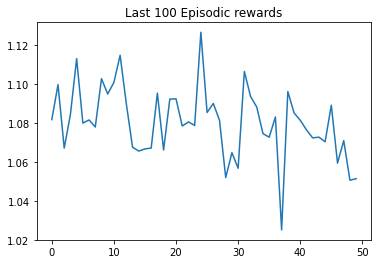

In [ ]:
# trainedmodel.get_parameters()
# episodic information
ls_reward = []
for i in range(len(trainedmodel.ep_info_buffer)):
  ls_reward.append(trainedmodel.ep_info_buffer[i]['r'])
(pd.DataFrame(ls_reward)/len(train.date.unique())).plot(title='Last 100 Episodic rewards',legend=False)

In [ ]:
print( f'mean rewards:{(pd.DataFrame(ls_reward)/epsLen).mean()}')
print( f'std rewads :{(pd.DataFrame(ls_reward)/epsLen).std()}')

mean rewards:0    1.080268
dtype: float64
std rewads :0    0.018228
dtype: float64


In [ ]:
# get_attributes(trainedmodel)

In [ ]:
model_name = f'{agent}_{nTimes}_{trainY}_{note}'
print(f'model saved to: {model_dir} as {model_name}')
trainedmodel.save(f'{model_dir}{model_name}')
  

model saved to: /content/drive/MyDrive/BackUp_RL_CodeBase/trained_models/ as PPO_50_1617_AllStocks_TA


## Reload agent

Haven't done this part yet

In [ ]:
# A2C reload and Evaluate

# from stable_baselines3.common.monitor import Monitor
# e_train_gym = Monitor(e_train_gym,filename = f'{save_dir}{log_folder}')
# # reload model
# from stable_baselines3 import A2C
# model_name = f'A2C_{nTimes}_{trainY}_{note}' # model_name ='A2C_127500_1617s.zip'
# model = A2C.load(f"{model_dir}{model_name}", env=e_train_gym)
# print(f'{model_name} loaded model from {model_dir}')
# # evaluate model
# from stable_baselines3.common.evaluation import evaluate_policy
# eval_return, eval_std = evaluate_policy(model = model, env = e_train_gym, \
#                 n_eval_episodes=2, deterministic=True, \
#                 render=False, callback=None, \
#                 reward_threshold=None, return_episode_rewards=True, warn=True)
# print(f'average reward :{np.round(eval_return,2)} std reward : {np.round(eval_std,2)}')

In [ ]:
# # DDPG reload and evaluate

# from stable_baselines3 import DDPG
# # model_name = f'DDPG_{nTimes}_{trainY}_{note}'
# # model_name ='DDPG_5000_1617_2Stocks_TA_5days'
# model_name = 'DDPG_100_1617_2Stocks_TA'
# model = DDPG.load(f"{model_dir}{model_name}", env=e_train_gym)
# print(f'{model_name} loaded model from {model_dir}')
# from stable_baselines3.common.evaluation import evaluate_policy
# eval_return, eval_std = evaluate_policy(model = model, env = e_train_gym, \
#                 n_eval_episodes=2, deterministic=True, \
#                 render=False, callback=None, \
#                 reward_threshold=None, return_episode_rewards=True, warn=True)
# print(f'average reward :{np.round(eval_return,2)} std reward : {np.round(eval_std,2)}')

## Further training

In [ ]:
# # nTimes = 2500
# # train further
# from stable_baselines3.common.callbacks import BaseCallback
# class TensorboardCallback(BaseCallback):
#     """
#     Custom callback for plotting additional values in tensorboard.
#     """
#     def __init__(self, verbose=0):
#         super().__init__(verbose)

#     def _on_step(self) -> bool:
#         try:
#             self.logger.record(key="train/reward", value=self.locals["rewards"][0])
#         except BaseException:
#             self.logger.record(key="train/reward", value=self.locals["reward"][0])
#         return True

# # trainingsteps
# epsLen = int(train.shape[0] / len(train.tic.unique()))
# TIMESTEPS = epsLen* nTimes
# print(f'episodic length: {epsLen},training times: {nTimes}, total steps: {TIMESTEPS}')
# %timeit
# trainedmodel = model.learn(total_timesteps=TIMESTEPS,log_interval=epsLen,\
#                          callback=TensorboardCallback(),tb_log_name=f'{agent}_{trainY}_{TIMESTEPS}')
# # trainedmodel.get_parameters()

In [ ]:
# # save model, manually rename the model + trainingTime
# model_name = f'{agent}_{10000}_{trainY}_{note}'
# print(f'model saved to: {model_dir} as {model_name}')
# trainedmodel.save(f'{model_dir}{model_name}')
  

# In sample Test

In [ ]:
def DRL_prediction(model, environment, deterministic=True):
    test_env, test_obs = environment.get_sb_env()
    """make a prediction"""
    account_memory = []
    actions_memory = []
    list_raw_acitons = []
#         state_memory=[] #add memory pool to store states
    test_env.reset()
    for i in range(len(environment.df.index.unique())):
        action, _states = model.predict(test_obs, deterministic=deterministic)
        # account_memory = test_env.env_method(method_name="save_asset_memory")
        # actions_memory = test_env.env_method(method_name="save_action_memory")
        test_obs, rewards, dones, info = test_env.step(action)
        list_raw_acitons.append(action)
        if i == (len(environment.df.index.unique()) - 2):
            account_memory = test_env.env_method(method_name="save_asset_memory")
            actions_memory = test_env.env_method(method_name="save_action_memory")
#                 state_memory=test_env.env_method(method_name="save_state_memory") # add current state to state memory
        if dones[0]:
            print("hit end!")
            break
    return account_memory[0], actions_memory[0], list_raw_acitons

In [ ]:
e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)    
dfIn_daily_return, dfIn_actions, dfIn_actionsRaw = DRL_prediction(model=trainedmodel,
                        environment = e_train_gym)

Streaming output truncated to the last 5000 lines.
2017-04-21    37.0    1.0  ...    21.0    22.0     8.0    29.0    14.0   

            STLA.MI  SU.PA  TTE.PA  VOW.DE      day  
2017-04-21      2.0   34.0     6.0    12.0  0.30315  

[1 rows x 43 columns]
portfolio return:0.0020494897072054702
portfolio value:1.128983939087928
new portfolio value: 1.131297780050689
Model actions:  [0.9139667  0.         0.         1.4049451  5.379963   0.
 1.2046502  4.260631   0.         0.         1.9269493  0.
 2.9985137  0.8369853  0.         0.         0.         0.
 0.         0.         1.7139996  0.         0.12201641 0.
 0.         5.5964265  0.         1.8247222  0.55342215 0.
 4.2228394  6.04726    0.         0.58964354 1.2880316  2.8725169
 0.         0.         0.         0.         0.         0.        ]
Weights:  [0.00217004 0.00087003 0.00087003 0.00354565 0.18880977 0.00087003
 0.00290208 0.06164598 0.00087003 0.00087003 0.00597585 0.00087003
 0.01744915 0.00200925 0.00087003 0.000870

## In sample performance

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


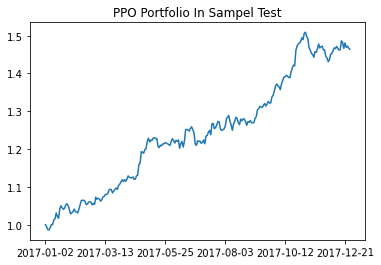

In [ ]:
dfIn_daily_return.daily_return.iloc[0] = 0
model_cumpod =(dfIn_daily_return.daily_return+1).cumprod()
model_cumpod.plot(title =f'{agent} Portfolio In Sampel Test')
list_date = dfIn_actions.index.tolist()
if len(list_date) >50:
  xtic = [list_date[i] for i in range(0,len(list_date),50)]#tic
  plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=True) 
else:
  pass
plt.show()

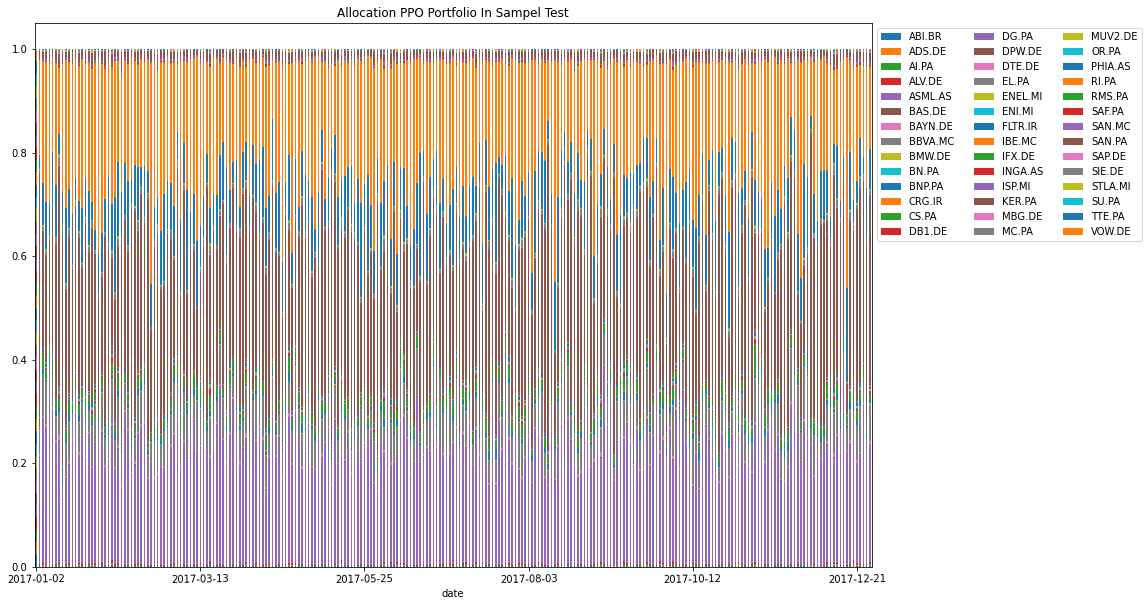

In [ ]:
list_date = dfIn_actions.index.tolist()
xtic = [list_date[i] for i in range(0,len(list_date),50)]#tic
dfIn_actions.plot.bar(title =f'Allocation {agent} Portfolio In Sampel Test',figsize=(15,10),stacked=True).legend(bbox_to_anchor=(1.0, 1.0),ncol=3)
if len(list_date) >50:
  plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=True) 
else:
  pass
plt.show()

In [ ]:
# dfIn_actions.mean(axis=0)

## Other Portfolio's

In [ ]:
def optimalPort(df):
  #optimal portfolio more assets, takes train as input
  from scipy.special import softmax
  pct = df.pivot(columns='tic',values='close',index='date').pct_change()
  ranks = pct.rank(axis=1,method='min') # rank of the return
  weights = softmax(ranks,axis=1) # softmaxed rank
  # store in df
  maxPort = pd.DataFrame()
  maxPort_R = pd.DataFrame()
  maxPort_W = pd.DataFrame()
  maxPort_R[[tick +'_returns' for tick in listSelection]] =pct
  maxPort_W[[tick +'_weights' for tick in listSelection]] = weights
  maxPort_RW = pd.DataFrame(maxPort_R.values * maxPort_W.values, columns=maxPort_R.columns, index=maxPort_R.index)
  maxPort['PortRet'] = maxPort_RW.sum(axis=1)
  maxPort['Indexed'] = (maxPort['PortRet']+1).cumprod()

  # # Inverted
  ranksInv = pct.rank(axis=1,method='min',ascending=False) # rank of the return
  weightsInv = softmax(ranksInv,axis=1) # softmaxed rank
  maxPortInverted_R = pd.DataFrame()
  maxPortInverted_W = pd.DataFrame()
  maxPortInverted_R = pct
  maxPortInverted_W = weightsInv
  maxPortInverted_RW = pd.DataFrame(maxPortInverted_R.values * maxPortInverted_W.values, columns=maxPortInverted_R.columns, index=maxPortInverted_R.index)
  #store value
  maxPort['PortRetInv'] = maxPortInverted_RW.sum(axis=1)
  maxPort['IndexedInv'] = (maxPort['PortRetInv']+1).cumprod()
  maxPort.Indexed.iloc[0] = 1
  maxPort.IndexedInv.iloc[0] = 1
  return maxPort
maxPort = optimalPort(train)  

In [ ]:
# #optimal portfolio: theoreticalMaxMin only apply to two assets
# theoreticalMax = 1
# from scipy.special import softmax
# pct = train.pivot(columns='tic',values='close',index='date').pct_change()
# if theoreticalMax:
#   ranks = pct.rank(axis=1,method='min')
#   weights = ranks-1
#   # Inverted
#   ranksInv = pct.rank(axis=1,method='min',ascending=False) # rank of the return
#   weightsInv = ranksInv-1 # softmaxed rank
# else:
#   ranks = pct.rank(axis=1,method='min') # rank of the return
#   weights = softmax(ranks,axis=1) # softmaxed rank
#   # Inverted
#   ranksInv = pct.rank(axis=1,method='min',ascending=False) # rank of the return
#   weightsInv = softmax(ranksInv,axis=1) # softmaxed rank
# # store in df
# maxPort = pd.DataFrame()
# maxPort[[tick +'_returns' for tick in listSelection]] =pct
# maxPort[[tick +'_rank' for tick in listSelection]] = ranks
# maxPort[[tick +'_weights' for tick in listSelection]] = weights
# maxPort['PortRet'] = maxPort['BBVA.MC_returns'] * maxPort['BBVA.MC_weights']+ maxPort['OR.PA_returns'] * maxPort['OR.PA_weights']
# maxPort['Indexed'] = (maxPort['PortRet']+1).cumprod()
# # Inverted
# maxPort[[tick +'_rankInv' for tick in listSelection]] = ranksInv
# maxPort[[tick +'_weightsInv' for tick in listSelection]] = weightsInv
# maxPort['PortRetInv'] = maxPort['BBVA.MC_returns'] * maxPort['BBVA.MC_weightsInv']+ maxPort['OR.PA_returns'] * maxPort['OR.PA_weightsInv']
# maxPort['IndexedInv'] = (maxPort['PortRetInv']+1).cumprod()
# maxPort.Indexed.iloc[0] = 1
# maxPort.IndexedInv.iloc[0] = 1

In [ ]:
# # weights two asset plot
# ax1= maxPort['BBVA.MC_weights'].plot.bar(figsize=(15,10),label = 'BBVA.MC',legend = True)
# maxPort['OR.PA_weights'].plot.bar(ax=ax1,color='orange',title='Allocation Optimal Portfolio',label = 'OR.PA', legend = True).legend(bbox_to_anchor=(1.0, 1.0),ncol=1)
# if maxPort.shape[0] >50:
#   plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=True) 
# else:
#   pass
# plt.show()

In [ ]:
def equalPort(df):
  #equally weighted
  pct = train.pivot(columns='tic',values='close',index='date').pct_change()
  eqPort = pct
  eqPort = pd.DataFrame()
  eqPort_R = pd.DataFrame()
  eqPort_W = pd.DataFrame()
  eqPort_R[[tick +'_returns' for tick in listSelection]] =pct
  eqPort_W[[tick +'_weightsEQ' for tick in listSelection]] = np.ones(shape=pct.shape)*(1/len(listSelection))
  eqPort_RW = pd.DataFrame(eqPort_R.values * eqPort_W.values, columns=eqPort_R.columns, index=eqPort_R.index)
  eqPort['PortRetEQ'] = eqPort_RW.sum(axis=1)
  eqPort['IndexedEQ'] = (eqPort['PortRetEQ']+1).cumprod()
  eqPort.IndexedEQ.iloc[0] =1
  return eqPort
eqPort = equalPort(train)


In [ ]:
# Min Max of the Random Agent
rndAgent = rndAgent.set_index(keys='date', drop=True) # reset index
rndMax = rndAgent.idxmax(axis=1)[-1] # return sim with max end return
rndMin = rndAgent.idxmin(axis=1)[-1] # return sim with max end return

In [ ]:
# expert model
def stateInput(df):
  stateInput = pd.DataFrame()
  for q in range(0,len(df.date),(len(df.tic.unique()))):
    temp = df.ar.iloc[q]
    if q != 0:
      stateInput = stateInput.append(temp)
    else:
      stateInput = temp
  stateInput = stateInput.drop(columns ='day') 
  return stateInput

train_state = stateInput(train)
pct = train.pivot(columns='tic',values='close',index='date').pct_change()
weights = softmax(train_state,axis=1) # softmaxed rank

expertPort = pd.DataFrame()
expertPort_R = pd.DataFrame()
expertPort_W = pd.DataFrame()
expertPort_R[[tick +'_returns' for tick in listSelection]] =pct
expertPort_W[[tick +'_weightsEQ' for tick in listSelection]] = weights
expertPort_RW = pd.DataFrame(expertPort_R.values * expertPort_W.values, columns=expertPort_R.columns, index=expertPort_R.index)
expertPort['PortRetEXP'] = expertPort_RW.sum(axis=1)
expertPort['IndexedEXP'] = (expertPort['PortRetEXP']+1).cumprod()
expertPort.IndexedEXP.iloc[0] =1


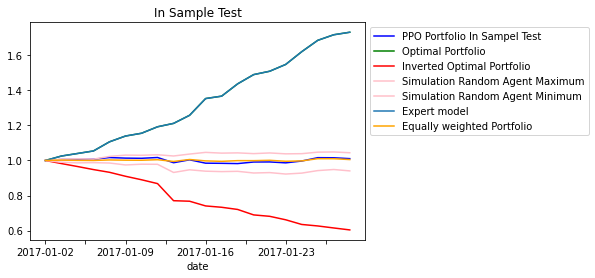

In [ ]:
ticStep=50 # tic step time
#drl agent
ax2=model_cumpod.plot(title='In Sample Test',label =f'{agent} Portfolio In Sampel Test',legend=True,color='blue')
# optimals
maxPort.Indexed.plot(label ='Optimal Portfolio',ax=ax2,legend=True,color='green')
maxPort.IndexedInv.plot(label='Inverted Optimal Portfolio', ax=ax2,legend=True,color='red')
#random agent
rndAgent[rndMax].plot(label='Simulation Random Agent Maximum',legend=True,ax=ax2,color ='pink')
rndAgent[rndMin].plot(label='Simulation Random Agent Minimum',legend=True,ax=ax2,color='pink')
# another 
expertPort.IndexedEXP.plot(label='Expert model',legend=True,ax=ax2)
#eq wgted
eqPort.IndexedEQ.plot(label='Equally weighted Portfolio',ax=ax2,legend=True,color='orange').legend(bbox_to_anchor=(1.0, 1.0),ncol=1)
list_date = dfIn_actions.index.tolist()
xtic = [list_date[i] for i in range(0,len(list_date),ticStep)]#tic
if len(list_date) >50:
  plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=45) 
else:
  pass
plt.show()

# Out of sample Test

In [ ]:
def DRL_prediction(model, environment, deterministic=True):
    environment = Monitor(environment,allow_early_resets=False)
    test_env, test_obs = environment.get_sb_env()
    test_env = VecNormalize(test_env) # first allow
    """make a prediction"""
    account_memory = []
    actions_memory = []
    list_raw_acitons = []
#         state_memory=[] #add memory pool to store states
    test_env.reset()
    for i in range(len(environment.df.index.unique())):
        action, _states = model.predict(test_obs, deterministic=False)
        # account_memory = test_env.env_method(method_name="save_asset_memory")
        # actions_memory = test_env.env_method(method_name="save_action_memory")
        test_obs, rewards, dones, info = test_env.step(action)
        list_raw_acitons.append(action)
        if i == (len(environment.df.index.unique()) - 2):
            account_memory = test_env.env_method(method_name="save_asset_memory")
            actions_memory = test_env.env_method(method_name="save_action_memory")
#                 state_memory=test_env.env_method(method_name="save_state_memory") # add current state to state memory
        if dones[0]:
            print("hit end!")
            break
    return account_memory[0], actions_memory[0], list_raw_acitons

In [ ]:
# environment
e_test_gym = StockPortfolioEnv(df = test, **env_kwargs)

# test model
dfOut_daily_return, dfOut_actions, dfOut_actionsRaw = DRL_prediction(model=trainedmodel,environment = e_test_gym)

Streaming output truncated to the last 5000 lines.
 4.618644   5.489785   0.         0.9406302  1.7406832  2.8078525
 0.         0.         0.         0.         0.         0.        ]
Weights:  [0.00131299 0.00068021 0.00068021 0.00245827 0.263788   0.00068021
 0.0038077  0.07386239 0.00068021 0.00068021 0.00550415 0.00068021
 0.01412359 0.00136283 0.00068021 0.00068021 0.00068021 0.00068021
 0.00068021 0.00068021 0.00289474 0.00068021 0.00131205 0.00068021
 0.00068021 0.35407963 0.00068021 0.00706923 0.00150906 0.00068021
 0.0689442  0.16475153 0.00068021 0.00174243 0.00387807 0.01127407
 0.00068021 0.00068021 0.00068021 0.00068021 0.00068021 0.00068021]
77
            ABI.BR  ADS.DE  AI.PA  ALV.DE  ASML.AS  BAS.DE  BAYN.DE  BBVA.MC  \
2018-04-23     2.0     7.0   18.0    28.0     35.0    20.0      8.0     14.0   

            BMW.DE  BN.PA  ...  SAF.PA  SAN.MC  SAN.PA  SAP.DE  SIE.DE  \
2018-04-23    17.0    5.0  ...    10.0    36.0    25.0    26.0    16.0   

            STLA.MI  S

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


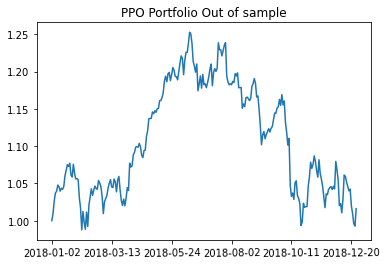

In [ ]:
dfOut_daily_return.daily_return.iloc[0] =0
outModel_cumpod =(dfOut_daily_return.daily_return+1).cumprod()
outModel_cumpod.plot(title =f'{agent} Portfolio Out of sample')
list_date = dfOut_actions.index.tolist()
xtic = [list_date[i] for i in range(0,len(list_date),50)]#tic
plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=True) 
plt.show()

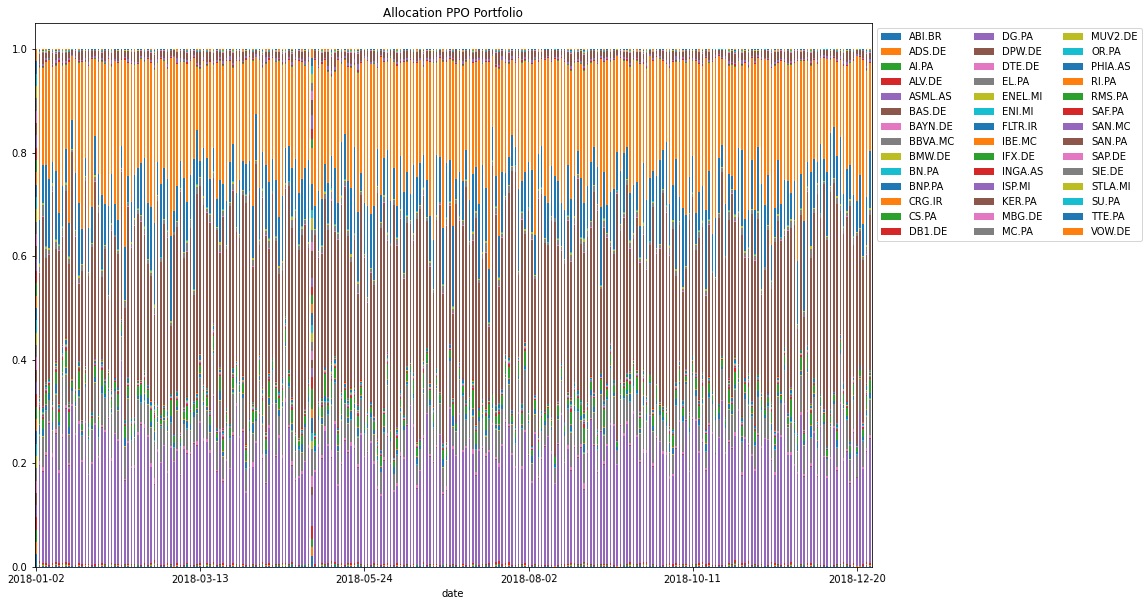

In [ ]:
list_date = dfOut_actions.index.tolist()
xtic = [list_date[i] for i in range(0,len(list_date),50)]#tic
dfOut_actions.plot.bar(title =f'Allocation {agent} Portfolio',figsize=(15,10),stacked=True).legend(bbox_to_anchor=(1.0, 1.0),ncol=3)
plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=True) 
plt.show()

### Optimal Portfolio

### Random Agent

In [ ]:
nSim =30
# wrapper on the environment, monitor episodic reward while taking random actions
from stable_baselines3.common.monitor import Monitor
# e_train_gym = Monitor(e_train_gym,filename=f'{save_dir}MonitorWrapperTerminalTesting'
e_test_gym = StockPortfolioEnv(df = test, **env_kwargs)
e_test_gym = Monitor(e_test_gym) # do not log
ls_eps_reward = []
ls_trajectory = {}
# test for 3 times
for i in range(nSim):
  #episodic length
  e_test_gym.reset()
  done = e_test_gym.terminal
  while not done:
    e_test_gym.seed(321)
    r_act = e_test_gym.action_space.sample()
    obs, reward, done ,info  = e_test_gym.step(r_act)
  eps_reward = e_test_gym.get_episode_rewards()
  ls_trajectory[i] = e_test_gym.save_asset_memory()
ls_eps_reward.append(eps_reward)

print(f'episodic reward:{ls_eps_reward}')

Streaming output truncated to the last 5000 lines.
[1 rows x 43 columns]
portfolio return:-0.006194905310910574
portfolio value:1.0008292140974018
new portfolio value: 0.9946291718836753
Model actions:  [8.532366   6.108623   3.9033096  0.5057292  7.2000785  9.308835
 6.602266   6.3108087  2.0946836  3.8115392  8.900202   7.6927614
 0.10816517 1.740792   7.907262   1.5707661  0.9860454  9.97492
 7.4852242  8.664232   0.7519345  0.50110424 3.716842   9.547032
 6.256658   9.179689   9.214425   7.3762465  2.4389555  6.6409216
 9.255242   8.932508   1.1103476  9.913331   6.9533815  9.469381
 0.837712   0.17643735 7.0731387  1.6126671  4.501258   4.763815  ]
Weights:  [3.3636384e-02 2.9798278e-03 3.2842462e-04 1.0987157e-05 8.8757351e-03
 7.3118217e-02 4.8817722e-03 3.6475335e-03 5.3821954e-05 2.9962658e-04
 4.8591293e-02 1.4526927e-02 7.3828742e-06 3.7780377e-05 1.8002387e-02
 3.1873147e-05 1.7761678e-05 1.4233206e-01 1.1804334e-02 3.8377635e-02
 1.4054354e-05 1.0936459e-05 2.7255481e-04 9

In [ ]:
# df daily return simulation
mcSim = ls_trajectory[0] 
mcSim=mcSim.rename(columns = {'daily_return':'sim_0'})
mcSim['sim_'+str(0)].iloc[0] = 0
for m in range(1,nSim):
  mcSim['sim_'+str(m)] = ls_trajectory[m].daily_return
  mcSim['sim_'+str(m)].iloc[0] = 0
# compute index performance
rndAgent = pd.DataFrame()
rndAgent['date'] = mcSim['date']
for m in range(0,nSim):
  rndAgent['simRun_'+str(m)] = (mcSim['sim_'+str(m)]+1).cumprod()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


mean: 1.0048, std: 0.0145


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


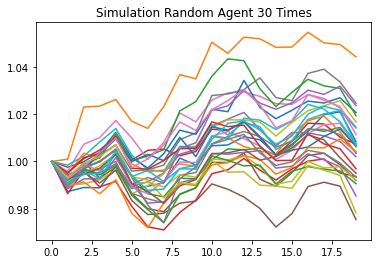

In [ ]:
# plot simulation, legend(bbox_to_anchor=(1.0, 1.0),ncol=3)
randMean = np.round(rndAgent.mean(axis=1).iloc[-1],4)
randStd = np.round(rndAgent.std(axis=1).iloc[-1],4)
print(f'mean: {randMean}, std: {randStd}')
rndAgent.plot(title=f'Simulation Random Agent {nSim} Times',legend=False)

In [ ]:
# Min Max of the Random Agent
rndAgent = rndAgent.set_index(keys='date', drop=True) # reset index
rndMax = rndAgent.idxmax(axis=1)[-1] # return sim with max end return
rndMin = rndAgent.idxmin(axis=1)[-1] # return sim with max end return

### Performance Chart

In [ ]:
maxPort = optimalPort(train)  
eqPort = equalPort(train)

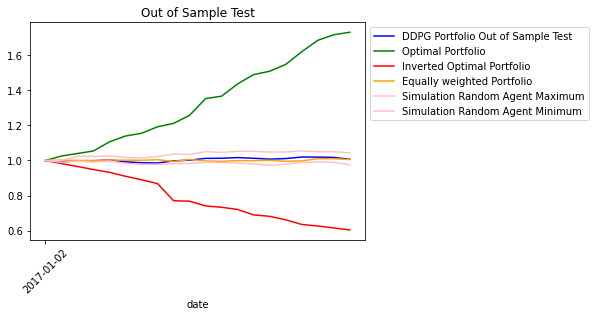

In [ ]:
#plot
ax2=outModel_cumpod.plot(title='Out of Sample Test',label ='DDPG Portfolio Out of Sample Test',legend=True,color='blue')
# optimum
maxPort.Indexed.plot(label ='Optimal Portfolio',ax=ax2,legend=True,color='green')
maxPort.IndexedInv.plot(label='Inverted Optimal Portfolio', ax=ax2,legend=True,color='red')
#eq
eqPort.IndexedEQ.plot(label='Equally weighted Portfolio',ax=ax2,legend=True,color='orange').legend(bbox_to_anchor=(1.0, 1.0),ncol=1)
#random agent
rndAgent[rndMax].plot(label='Simulation Random Agent Maximum',legend=True,ax=ax2,color ='pink')
rndAgent[rndMin].plot(label='Simulation Random Agent Minimum',legend=True,ax=ax2,color='pink').legend(bbox_to_anchor=(1.0, 1.0),ncol=1)
list_date = dfIn_actions.index.tolist()
xtic = [list_date[i] for i in range(0,len(list_date),50)]#tic
plt.xticks(ticks =np.arange(0,len(list_date),step=50),labels=xtic,rotation=45) 
plt.show()

# Log

In [ ]:
print(f'{save_dir}{log_folder}')

/content/drive/MyDrive/BackUp_RL_CodeBase/log_RL/PPO_500_1617_2Stocks_TA_5days/


In [ ]:
# result = pd.read_csv('log_RL/PPO_5000_1617_2Stocks_TA_5days/progress.csv') 

In [ ]:
result = pd.read_csv(f'{save_dir}{log_folder}progress.csv')
result

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a07cbc510>,
      dtype=object)

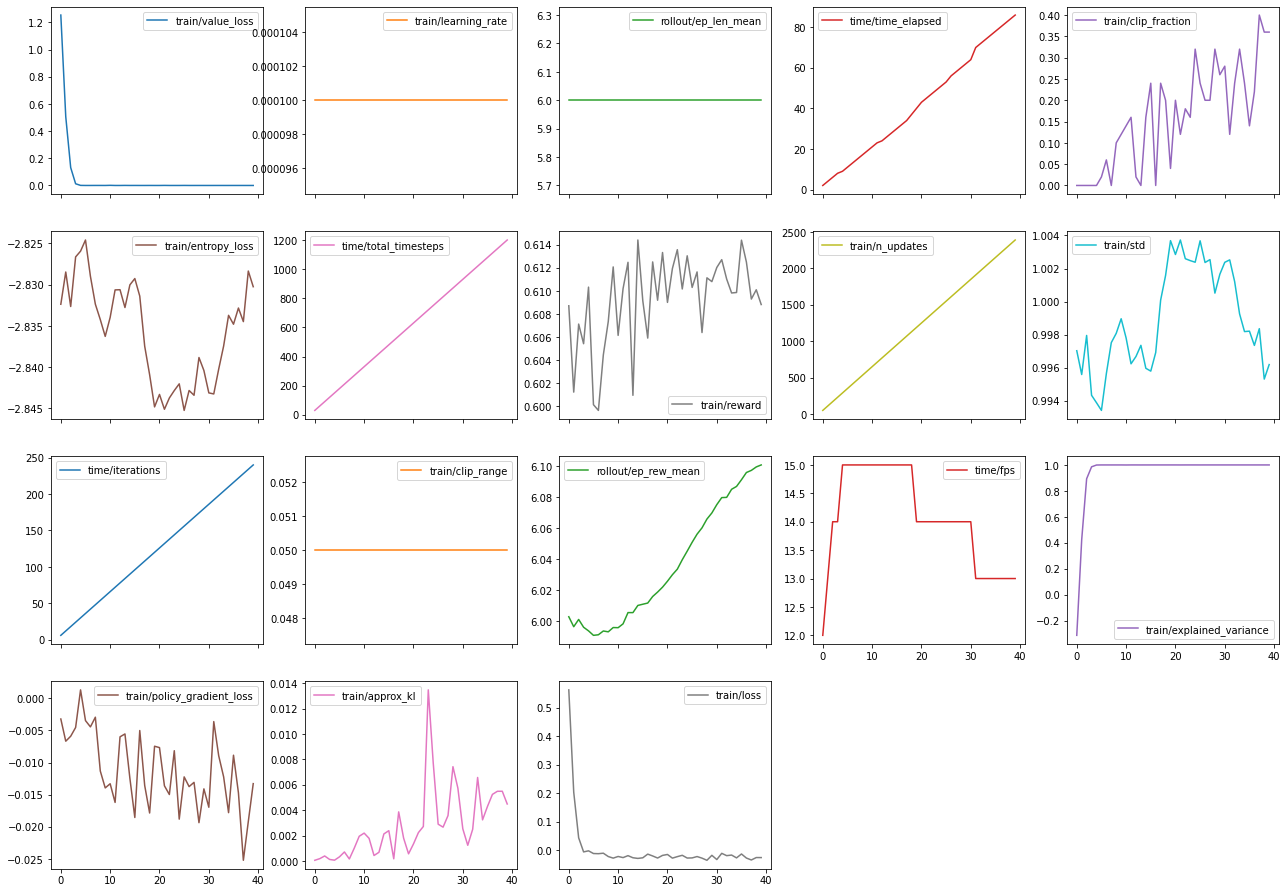

In [ ]:
result.plot(subplots=True, layout=(5,5),figsize=(22,20))

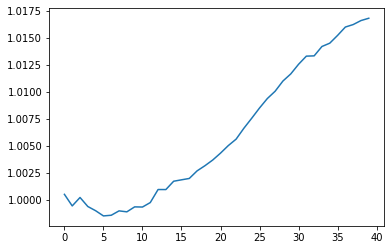

In [ ]:
(result['rollout/ep_rew_mean']/len(train.date.unique())).plot()

In [ ]:
# (1+result['rollout/ep_rew_mean']).plot(title = 'Mean Episodic Reward per five episode')

In [ ]:
# another log file, monitor file
# # read monitor file and plot return from moniotr file
# from stable_baselines3.common.monitor import load_results
# r1 = load_results(f'{save_dir}{log_folder}')